### Importando as bibliotecas e pacotes

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

### Carregando o dataset

In [2]:
path = "../data/dados_consumo_agua.pkl"

df = pd.read_pickle(path)
df.head()

,ano,mes,dia,hora,quantidade_pessoas,cidade,bairro,consumo_agua_m3,padrao_consumo
0,2020,1,Quarta,0,3,Joinville,Centro,0.040009,Normal
1,2020,1,Quarta,1,3,Joinville,Centro,0.260010,Normal
2,2020,1,Quarta,2,3,Joinville,Centro,0.290039,Normal
3,2020,1,Quarta,3,3,Joinville,Centro,0.180054,Normal
4,2020,1,Quarta,4,3,Joinville,Centro,0.580078,Alto


### Estatísticas descritivas dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ano                 35040 non-null  uint16  
 1   mes                 35040 non-null  uint8   
 2   dia                 35040 non-null  category
 3   hora                35040 non-null  uint8   
 4   quantidade_pessoas  35040 non-null  uint8   
 5   cidade              35040 non-null  category
 6   bairro              35040 non-null  category
 7   consumo_agua_m3     35040 non-null  float16 
 8   padrao_consumo      35040 non-null  category
dtypes: category(4), float16(1), uint16(1), uint8(3)
memory usage: 376.6 KB


In [4]:
df['consumo_agua_m3'].describe()

count    35040.000000
mean         0.975586
std          0.810547
min          0.029999
25%          0.310059
50%          0.799805
75%          1.339844
max          5.269531
Name: consumo_agua_m3, dtype: float64

### Análise univariada

##### Boxplot

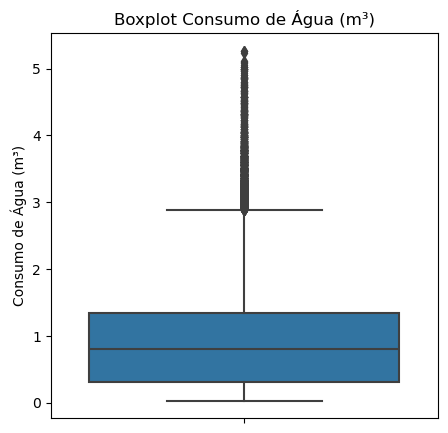

In [5]:
figure = plt.figure(figsize=(5, 5))
sns.boxplot(y=df['consumo_agua_m3'])
plt.title('Boxplot Consumo de Água (m³)')
plt.ylabel('Consumo de Água (m³)')
plt.show()

##### Histograma

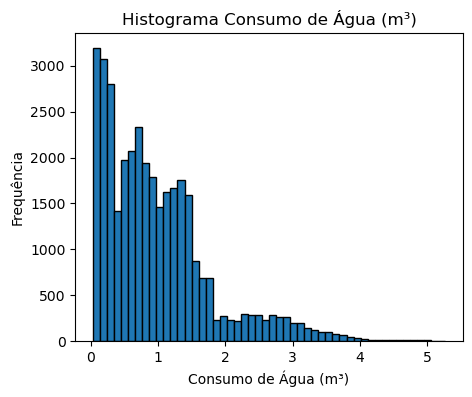

In [6]:
figure = plt.figure(figsize=(5, 4))
plt.hist(df['consumo_agua_m3'], bins=50, edgecolor='black')
plt.title('Histograma Consumo de Água (m³)')
plt.xlabel('Consumo de Água (m³)')
plt.ylabel('Frequência')
plt.show()

### Análise multivariada

##### Consumo de água (média) por mês

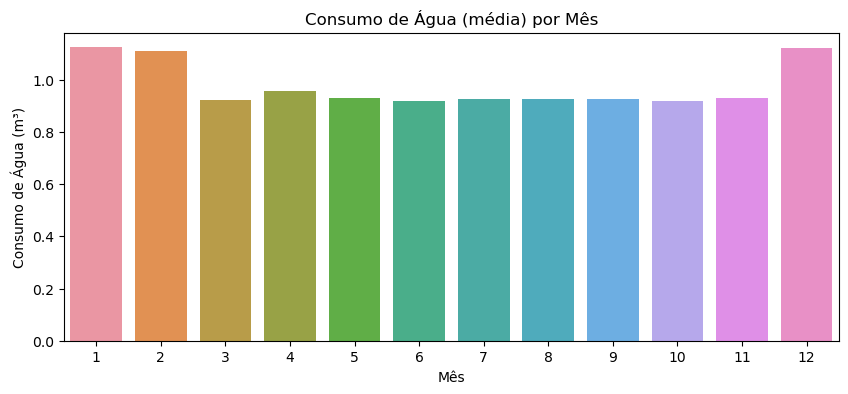

In [7]:
dados_consumo_mes = df.groupby('mes')['consumo_agua_m3'].aggregate('mean').reset_index()

figure = plt.figure(figsize=(10, 4))
sns.barplot(x='mes', y='consumo_agua_m3', data=dados_consumo_mes)
plt.title('Consumo de Água (média) por Mês')
plt.xlabel('Mês')
plt.ylabel('Consumo de Água (m³)')
plt.show()

##### Consumo de água (média) por dia

/home/matheus/miniconda3/envs/cepedi/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


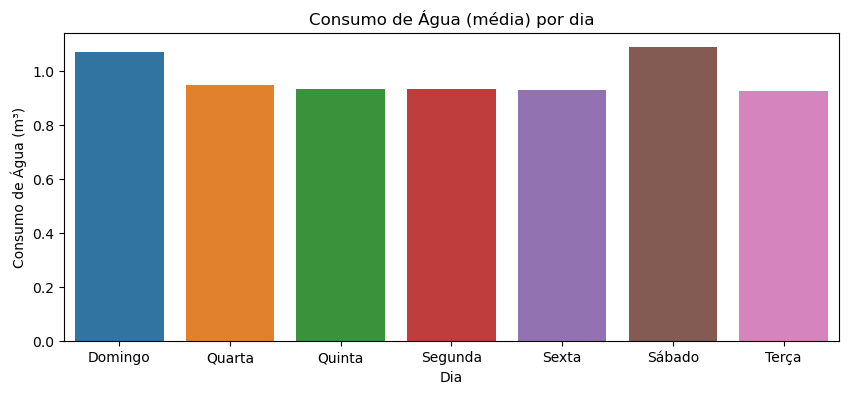

In [8]:
dados_consumo_dia = df.groupby('dia', observed=True)['consumo_agua_m3'].aggregate('mean') \
    .reset_index()

figure = plt.figure(figsize=(10, 4))
sns.barplot(x='dia', y='consumo_agua_m3', data=dados_consumo_dia)
plt.title('Consumo de Água (média) por dia')
plt.xlabel('Dia')
plt.ylabel('Consumo de Água (m³)')
plt.show()

##### Consumo de água (média) por hora

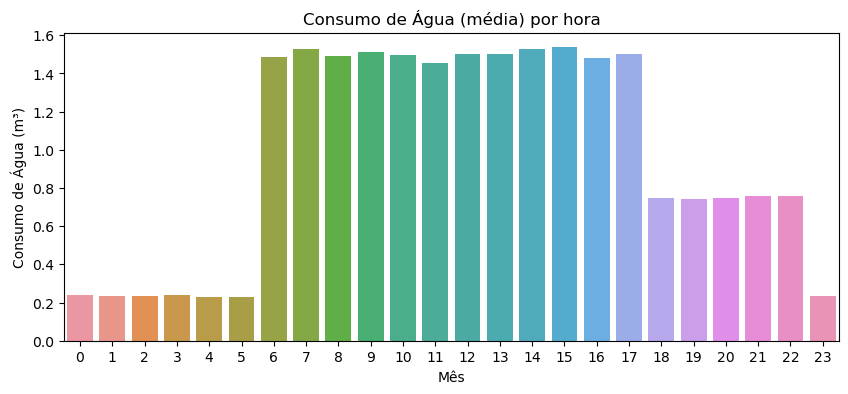

In [9]:
dados_consumo_hora = df.groupby('hora')['consumo_agua_m3'].aggregate('mean').reset_index()

figure = plt.figure(figsize=(10, 4))
sns.barplot(x='hora', y='consumo_agua_m3', data=dados_consumo_hora)
plt.title('Consumo de Água (média) por hora')
plt.xlabel('Mês')
plt.ylabel('Consumo de Água (m³)')
plt.show()